In [ ]:
!pip install opendatasets
!pip install pandas
!pip install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/sukmaadhiwijaya/welding-defect-object-detection/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: victoryagent
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sukmaadhiwijaya/welding-defect-object-detection


In [ ]:
# Install YOLOv8 and necessary dependencies
!pip install ultralytics

import os
import shutil
import matplotlib.pyplot as plt
import cv2
import random
from IPython.display import Image, display
import pandas as pd
import seaborn as sns
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.1/994.1 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 863.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Import wandb and log in
!pip install wandb
import wandb

# Log in to wandb with API key
wandb.login(key='eb4c4a1fa7eec1ffbabc36420ba1166f797d4ac5')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: faf2001f (faf2001f-university-of-engineering-and-technology-taxila) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
# Define paths
root_dir = '/content/welding-defect-object-detection/'
v1_dir = os.path.join(root_dir, 'The Welding Defect Dataset/The Welding Defect Dataset')
v2_dir = os.path.join(root_dir, 'The Welding Defect Dataset - v2/The Welding Defect Dataset - v2')

In [ ]:
# Ensure the YOLOv8 data directories exist
os.makedirs('yolov8/data/welding_v1', exist_ok=True)
os.makedirs('yolov8/data/welding_v2', exist_ok=True)

Displaying some training images from version 1:


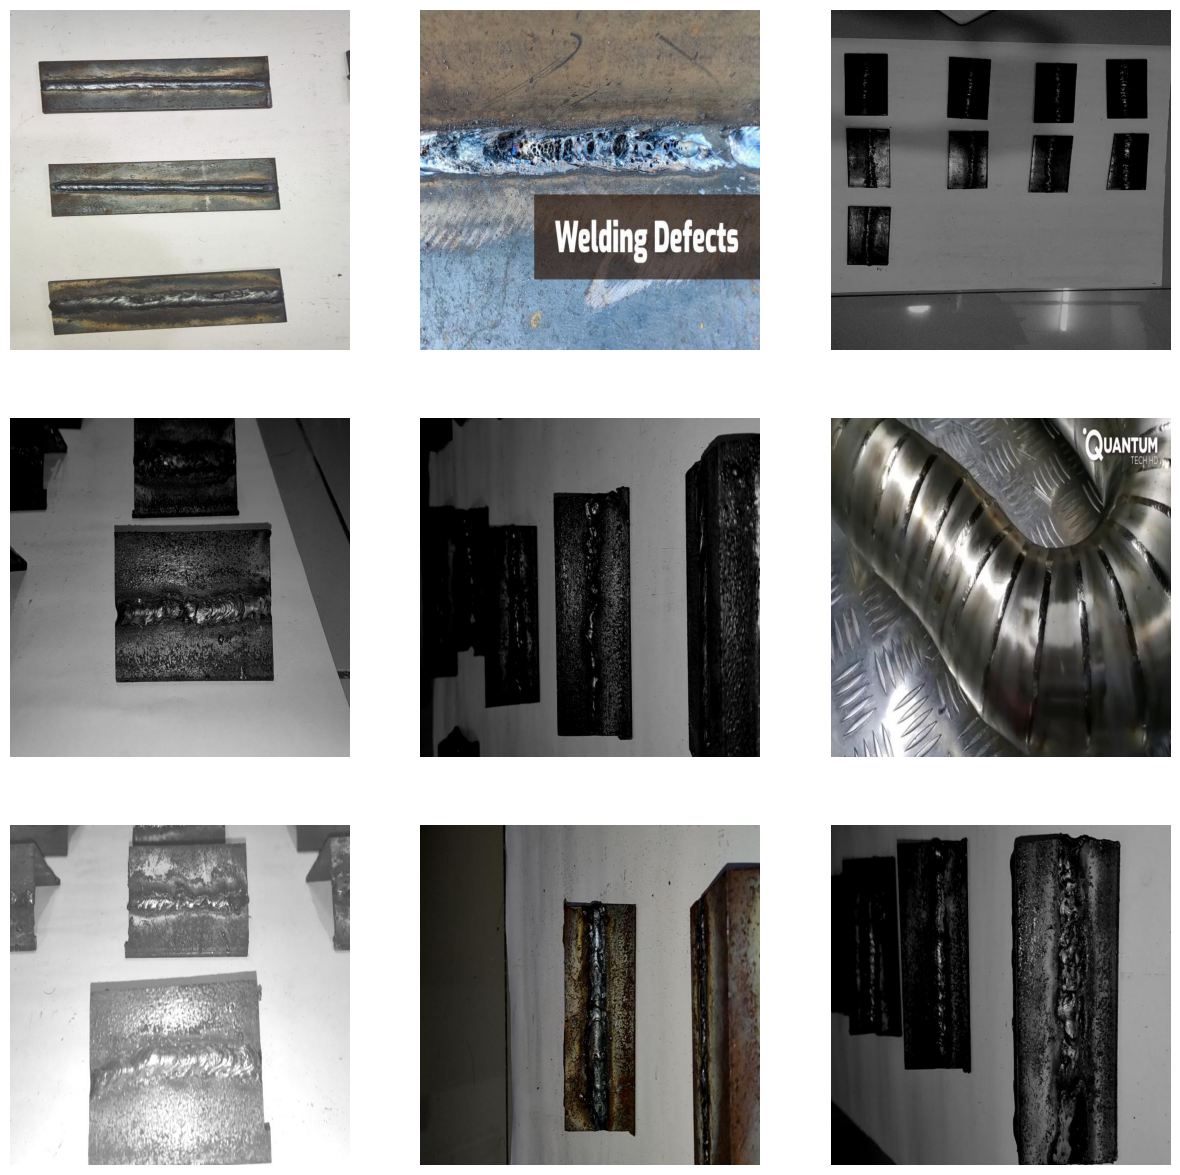

Displaying some training images from version 2:


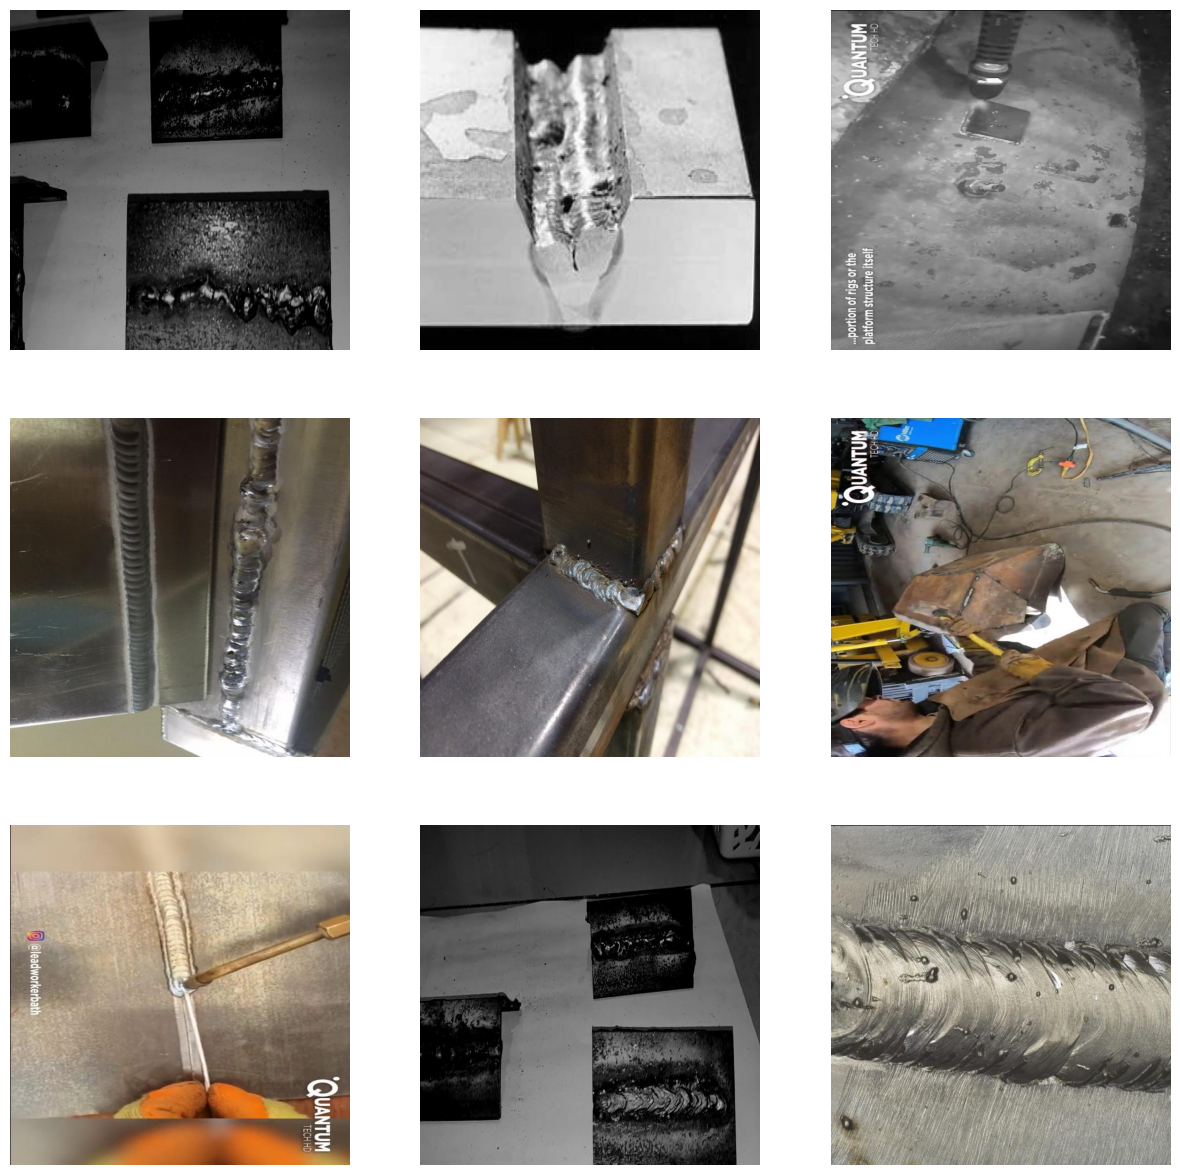

In [ ]:
# Function to display images
def display_images(image_dir, num_images=9):
    images = os.listdir(image_dir)
    sample_images = random.sample(images, num_images)
    plt.figure(figsize=(15, 15))
    for i, image_name in enumerate(sample_images):
        image_path = os.path.join(image_dir, image_name)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
    plt.show()

# Display some training images
print("Displaying some training images from version 1:")
display_images(os.path.join(v1_dir, 'train/images'))

print("Displaying some training images from version 2:")
display_images(os.path.join(v2_dir, 'train/images'))

In [ ]:
# Copy dataset to YOLOv8 directory
def copy_dataset_to_yolo(src_dir, dest_dir):
    if os.path.exists(dest_dir):
        shutil.rmtree(dest_dir)
    shutil.copytree(src_dir, dest_dir)

# Copy version 1 dataset
copy_dataset_to_yolo(v1_dir, 'yolov8/data/welding_v1')

# Copy version 2 dataset
copy_dataset_to_yolo(v2_dir, 'yolov8/data/welding_v2')

In [ ]:
# Update data.yaml paths
def update_data_yaml(data_yaml_path, base_dir):
    with open(data_yaml_path, 'r') as file:
        data_yaml = file.read()
    data_yaml = data_yaml.replace('../train/images', os.path.join(base_dir, 'train/images'))
    data_yaml = data_yaml.replace('../valid/images', os.path.join(base_dir, 'valid/images'))
    data_yaml = data_yaml.replace('../test/images', os.path.join(base_dir, 'test/images'))
    with open(data_yaml_path, 'w') as file:
        file.write(data_yaml)

# Update data.yaml for version 1
update_data_yaml('yolov8/data/welding_v1/data.yaml', '/content/yolov8/data/welding_v1')

# Update data.yaml for version 2
update_data_yaml('yolov8/data/welding_v2/data.yaml', '/content/yolov8/data/welding_v2')

# Print and verify updated data.yaml files
def print_data_yaml(data_yaml_path):
    with open(data_yaml_path, 'r') as file:
        print(file.read())

print("Updated data.yaml for version 1:")
print_data_yaml('yolov8/data/welding_v1/data.yaml')

print("Updated data.yaml for version 2:")
print_data_yaml('yolov8/data/welding_v2/data.yaml')

Updated data.yaml for version 1:
train: /content/yolov8/data/welding_v1/train/images
val: /content/yolov8/data/welding_v1/valid/images
test: /content/yolov8/data/welding_v1/test/images

nc: 3
names: ['Bad Weld', 'Good Weld', 'Defect']


Updated data.yaml for version 2:
train: /content/yolov8/data/welding_v2/train/images
val: /content/yolov8/data/welding_v2/valid/images
test: /content/yolov8/data/welding_v2/test/images

nc: 3
names: ['Bad Weld', 'Good Weld', 'Defect']




In [ ]:
# EDA and Preprocessing
def load_labels(label_dir):
    label_files = os.listdir(label_dir)
    data = []
    for label_file in label_files:
        with open(os.path.join(label_dir, label_file), 'r') as file:
            lines = file.readlines()
            for line in lines:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                data.append([label_file, class_id, x_center, y_center, width, height])
    df = pd.DataFrame(data, columns=['file', 'class_id', 'x_center', 'y_center', 'width', 'height'])
    return df

v1_train_labels = load_labels(os.path.join(v1_dir, 'train/labels'))
v2_train_labels = load_labels(os.path.join(v2_dir, 'train/labels'))

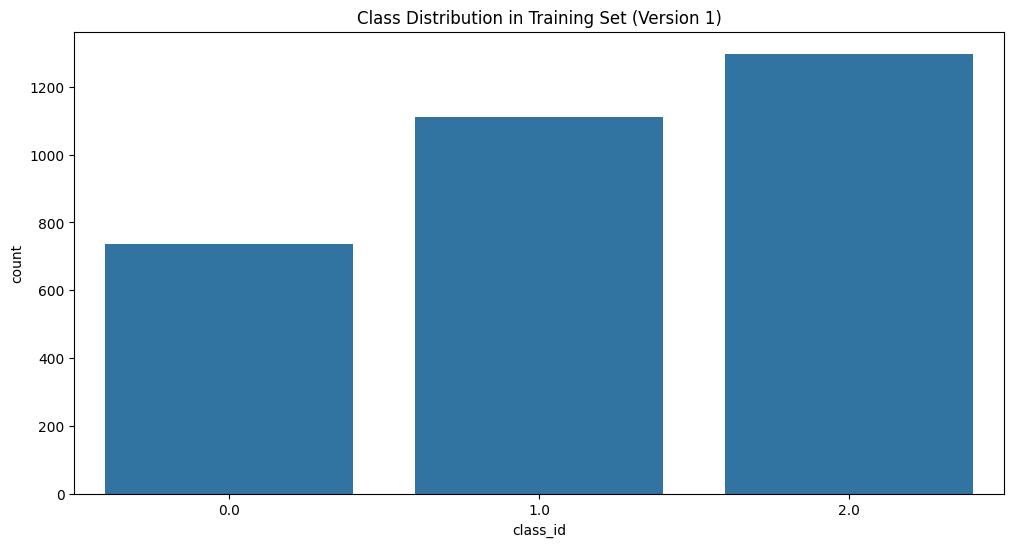

In [ ]:
# Plot class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=v1_train_labels, x='class_id')
plt.title('Class Distribution in Training Set (Version 1)')
plt.show()

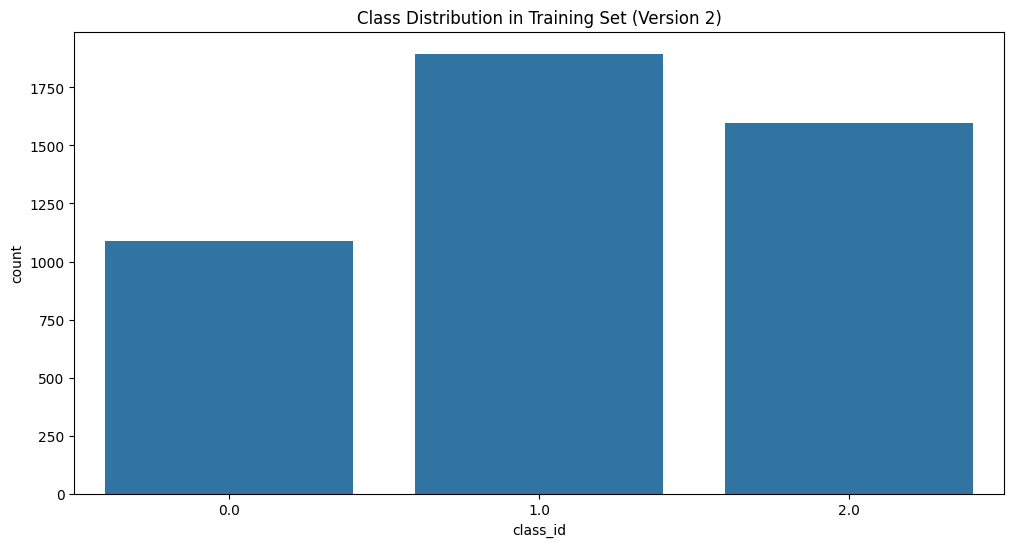

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=v2_train_labels, x='class_id')
plt.title('Class Distribution in Training Set (Version 2)')
plt.show()

In [ ]:
# Train YOLOv8 model with augmentation and hyperparameter tuning
# Initialize model
model_v1 = YOLO('yolov8m.pt')  # YOLOv8m (medium) model
model_v2 = YOLO('yolov8m.pt')  # YOLOv8m (medium) model

100%|██████████| 49.7M/49.7M [00:00<00:00, 423MB/s]


In [ ]:
# Train model on version 1 dataset
model_v1.train(data='/content/yolov8/data/welding_v1/data.yaml', epochs=100, imgsz=640, batch=16, name='welding_v1_aug',
               lr0=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,
               box=0.05, cls=0.5, iou=0.2, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, translate=0.1, scale=0.5, mosaic=1.0, mixup=0.5)

# Train model on version 2 dataset
model_v2.train(data='/content/yolov8/data/welding_v2/data.yaml', epochs=100, imgsz=640, batch=16, name='welding_v2_aug',
               lr0=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,
               box=0.05, cls=0.5, iou=0.2, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, translate=0.1, scale=0.5, mosaic=1.0, mixup=0.5)

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/yolov8/data/welding_v1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=welding_v1_aug, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.2, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 120MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 419MB/s]


AMP: checks passed ✅


train: Scanning /content/yolov8/data/welding_v1/train/labels... 839 images, 0 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:00<00:00, 1494.27it/s]

train: New cache created: /content/yolov8/data/welding_v1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolov8/data/welding_v1/valid/labels... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<00:00, 1167.04it/s]

val: New cache created: /content/yolov8/data/welding_v1/valid/labels.cache


Plotting labels to runs/detect/welding_v1_aug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/welding_v1_aug
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.74G    0.01442      2.812      1.854         56        640: 100%|██████████| 53/53 [00:08<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]

                   all        176        573      0.236      0.327      0.162     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.95G    0.01372      2.413      1.787         60        640: 100%|██████████| 53/53 [00:06<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.16it/s]

                   all        176        573      0.203      0.266      0.124     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.01G     0.0141      2.422      1.877         57        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.36it/s]

                   all        176        573      0.164      0.208      0.069     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.08G     0.0142      2.373      1.871         45        640: 100%|██████████| 53/53 [00:06<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.24it/s]

                   all        176        573      0.319      0.322      0.208     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.15G    0.01374      2.327       1.83         59        640: 100%|██████████| 53/53 [00:06<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.73it/s]

                   all        176        573       0.22      0.307      0.178     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.21G    0.01346      2.234      1.779         43        640: 100%|██████████| 53/53 [00:06<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.45it/s]

                   all        176        573       0.36      0.438      0.317      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.28G    0.01325      2.197      1.765         70        640: 100%|██████████| 53/53 [00:06<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all        176        573      0.317      0.337      0.267      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.35G    0.01308       2.16      1.742         38        640: 100%|██████████| 53/53 [00:06<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.50it/s]

                   all        176        573      0.438      0.339      0.321      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.41G    0.01264      2.093       1.71         37        640: 100%|██████████| 53/53 [00:06<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.37it/s]

                   all        176        573      0.342      0.471      0.286      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.48G    0.01266      2.071      1.693         71        640: 100%|██████████| 53/53 [00:06<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.58it/s]

                   all        176        573      0.432      0.492      0.381      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.55G    0.01239       2.05      1.682         46        640: 100%|██████████| 53/53 [00:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.55it/s]

                   all        176        573       0.65      0.391      0.357      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.62G     0.0123      2.017      1.678         60        640: 100%|██████████| 53/53 [00:06<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.47it/s]

                   all        176        573      0.352      0.439      0.355      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.68G    0.01204      1.965      1.634         66        640: 100%|██████████| 53/53 [00:06<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]

                   all        176        573      0.368      0.554      0.389      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.75G    0.01217       1.99      1.662         40        640: 100%|██████████| 53/53 [00:06<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.69it/s]

                   all        176        573      0.381      0.501       0.39      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.82G    0.01195      1.898      1.629         50        640: 100%|██████████| 53/53 [00:06<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.46it/s]

                   all        176        573      0.413      0.506      0.398      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.88G    0.01188      1.909      1.632         63        640: 100%|██████████| 53/53 [00:06<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.34it/s]

                   all        176        573      0.428      0.458      0.354      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.44G    0.01152      1.831      1.579         80        640: 100%|██████████| 53/53 [00:06<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.81it/s]

                   all        176        573      0.422      0.506      0.384      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       9.5G    0.01168      1.857       1.61         65        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.66it/s]

                   all        176        573      0.442      0.536      0.402      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.57G    0.01164      1.825      1.597         84        640: 100%|██████████| 53/53 [00:06<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.71it/s]

                   all        176        573       0.42      0.517      0.391      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.64G     0.0115      1.765      1.563         43        640: 100%|██████████| 53/53 [00:06<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.78it/s]

                   all        176        573      0.495      0.513      0.451      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.71G    0.01142      1.783      1.568         61        640: 100%|██████████| 53/53 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.56it/s]

                   all        176        573      0.487      0.466      0.412      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.77G    0.01117      1.732      1.546         74        640: 100%|██████████| 53/53 [00:06<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.64it/s]

                   all        176        573      0.488      0.516      0.462      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.84G    0.01129      1.739      1.565         60        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.57it/s]

                   all        176        573      0.513      0.555      0.498      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       9.9G    0.01121      1.703      1.538         74        640: 100%|██████████| 53/53 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.59it/s]

                   all        176        573      0.502      0.594      0.491      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.97G    0.01089      1.668      1.521        134        640: 100%|██████████| 53/53 [00:06<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.73it/s]

                   all        176        573      0.498      0.552      0.497      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        10G    0.01121      1.693      1.544         63        640: 100%|██████████| 53/53 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.60it/s]

                   all        176        573      0.497      0.572      0.471      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.1G    0.01111      1.689      1.538         51        640: 100%|██████████| 53/53 [00:06<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.65it/s]

                   all        176        573      0.555      0.536       0.48      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        11G    0.01089      1.631      1.519         58        640: 100%|██████████| 53/53 [00:06<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.78it/s]

                   all        176        573      0.502      0.587      0.492      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        11G    0.01097      1.668      1.534         48        640: 100%|██████████| 53/53 [00:06<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.68it/s]

                   all        176        573      0.591       0.55      0.499      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.1G    0.01093       1.62      1.519         26        640: 100%|██████████| 53/53 [00:06<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.70it/s]

                   all        176        573      0.562      0.551       0.51      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.2G    0.01074      1.621      1.508         69        640: 100%|██████████| 53/53 [00:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.59it/s]

                   all        176        573      0.511      0.593      0.527      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.2G     0.0105      1.552      1.477         59        640: 100%|██████████| 53/53 [00:06<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.70it/s]

                   all        176        573      0.514      0.578      0.517      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.3G    0.01064      1.551      1.491         49        640: 100%|██████████| 53/53 [00:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.65it/s]

                   all        176        573      0.546      0.568      0.516      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.4G    0.01047      1.552      1.483         47        640: 100%|██████████| 53/53 [00:06<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]

                   all        176        573      0.526      0.602      0.524      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.4G     0.0105      1.557       1.49         42        640: 100%|██████████| 53/53 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.67it/s]

                   all        176        573      0.519      0.602      0.529      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.5G    0.01047      1.541      1.491         50        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.61it/s]

                   all        176        573      0.504      0.622      0.522      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.6G     0.0102      1.474      1.434         57        640: 100%|██████████| 53/53 [00:06<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.79it/s]

                   all        176        573      0.504      0.567       0.49      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.6G    0.01025       1.46      1.442         45        640: 100%|██████████| 53/53 [00:06<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.69it/s]

                   all        176        573      0.561      0.581      0.529      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.8G    0.01021      1.463       1.44         77        640: 100%|██████████| 53/53 [00:06<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.56it/s]

                   all        176        573      0.498      0.547      0.495      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        12G    0.01022      1.479      1.454         64        640: 100%|██████████| 53/53 [00:06<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.70it/s]

                   all        176        573      0.578      0.573      0.541      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.6G    0.01013      1.436      1.441         70        640: 100%|██████████| 53/53 [00:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.70it/s]

                   all        176        573      0.538      0.569      0.523      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.6G    0.01028      1.437      1.446         63        640: 100%|██████████| 53/53 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.67it/s]

                   all        176        573      0.527      0.619      0.556      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.7G    0.01003       1.39      1.417         60        640: 100%|██████████| 53/53 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.67it/s]

                   all        176        573        0.6      0.548      0.542        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.8G    0.01003      1.392       1.43         42        640: 100%|██████████| 53/53 [00:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.80it/s]

                   all        176        573      0.573       0.59      0.544      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.8G   0.009896      1.349      1.419         69        640: 100%|██████████| 53/53 [00:06<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.64it/s]

                   all        176        573      0.533      0.589      0.531      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      12.9G    0.01004      1.423       1.44         62        640: 100%|██████████| 53/53 [00:06<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.72it/s]

                   all        176        573      0.592      0.582      0.555      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        13G    0.01006      1.383      1.426         66        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.81it/s]

                   all        176        573      0.592      0.606      0.587      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.3G   0.009835      1.367      1.415         46        640: 100%|██████████| 53/53 [00:06<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.77it/s]

                   all        176        573      0.613      0.574      0.572       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.3G   0.009811      1.347      1.405         60        640: 100%|██████████| 53/53 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.75it/s]

                   all        176        573      0.616      0.628      0.614       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.4G   0.009737      1.344      1.408         58        640: 100%|██████████| 53/53 [00:06<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.76it/s]

                   all        176        573      0.624      0.574      0.559      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.6G   0.009599      1.304      1.385         57        640: 100%|██████████| 53/53 [00:06<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.75it/s]

                   all        176        573      0.635       0.61      0.591      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.8G   0.009831      1.321      1.398         95        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.61it/s]

                   all        176        573      0.532      0.569      0.518      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.9G   0.009726      1.295      1.398         58        640: 100%|██████████| 53/53 [00:06<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.73it/s]

                   all        176        573      0.602      0.593      0.586       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.1G   0.009641      1.283      1.386         45        640: 100%|██████████| 53/53 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.71it/s]

                   all        176        573      0.621      0.569      0.571      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.1G   0.009777      1.329      1.419         36        640: 100%|██████████| 53/53 [00:06<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.65it/s]

                   all        176        573      0.594      0.611      0.597      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.4G   0.009433       1.24      1.368         62        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.67it/s]

                   all        176        573      0.639      0.626      0.613      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      14.5G   0.009335      1.233      1.359         40        640: 100%|██████████| 53/53 [00:06<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.81it/s]

                   all        176        573      0.605      0.616      0.578      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      14.6G   0.009408      1.223      1.362         84        640: 100%|██████████| 53/53 [00:06<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.77it/s]

                   all        176        573      0.611      0.618        0.6      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.8G   0.009423      1.216      1.372         58        640: 100%|██████████| 53/53 [00:06<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.74it/s]

                   all        176        573      0.623      0.654      0.627      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        15G   0.009302      1.216      1.362         47        640: 100%|██████████| 53/53 [00:06<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.75it/s]

                   all        176        573      0.642      0.602      0.607      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      15.5G    0.00933      1.215      1.369         51        640: 100%|██████████| 53/53 [00:06<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.75it/s]

                   all        176        573      0.648      0.607      0.587      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      15.6G   0.009278      1.215      1.361         66        640: 100%|██████████| 53/53 [00:06<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.77it/s]

                   all        176        573       0.64       0.58      0.602      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      15.6G   0.009181      1.188      1.348         47        640: 100%|██████████| 53/53 [00:06<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.74it/s]

                   all        176        573      0.632      0.648      0.625      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      15.7G   0.009153       1.18      1.334         45        640: 100%|██████████| 53/53 [00:06<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.65it/s]

                   all        176        573      0.588       0.65      0.615      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      15.8G   0.009051      1.159      1.322         85        640: 100%|██████████| 53/53 [00:06<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.77it/s]

                   all        176        573      0.631      0.619      0.609      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      15.8G   0.008979      1.158      1.319         98        640: 100%|██████████| 53/53 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.75it/s]

                   all        176        573      0.601      0.622       0.57      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100        16G   0.008987      1.138       1.32         40        640: 100%|██████████| 53/53 [00:06<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]

                   all        176        573      0.638      0.628      0.608      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      16.2G   0.009048      1.146      1.329         39        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.55it/s]

                   all        176        573       0.63      0.647      0.621      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      16.3G   0.008932      1.124      1.317         39        640: 100%|██████████| 53/53 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.71it/s]

                   all        176        573      0.629       0.62      0.617      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      16.5G   0.008831       1.11        1.3         81        640: 100%|██████████| 53/53 [00:06<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.68it/s]

                   all        176        573      0.656      0.627      0.639      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      16.6G   0.008757      1.108      1.304         63        640: 100%|██████████| 53/53 [00:06<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.85it/s]

                   all        176        573       0.64      0.656      0.649      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      16.8G   0.008653      1.083      1.293         44        640: 100%|██████████| 53/53 [00:06<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.77it/s]

                   all        176        573      0.662      0.629      0.643      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      16.9G     0.0087      1.086      1.292         71        640: 100%|██████████| 53/53 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.74it/s]

                   all        176        573      0.706       0.64       0.66      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        17G   0.008708      1.099      1.304         90        640: 100%|██████████| 53/53 [00:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.80it/s]

                   all        176        573      0.641      0.646      0.636      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      17.2G   0.008719      1.081      1.297         66        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.61it/s]

                   all        176        573      0.642      0.628      0.624      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      17.4G   0.008704      1.079      1.306         40        640: 100%|██████████| 53/53 [00:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.65it/s]

                   all        176        573      0.621      0.627      0.606      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      17.4G   0.008605      1.075        1.3         46        640: 100%|██████████| 53/53 [00:06<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.74it/s]

                   all        176        573      0.637      0.647      0.637      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      17.7G   0.008534      1.055      1.273         67        640: 100%|██████████| 53/53 [00:06<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.66it/s]

                   all        176        573      0.623      0.659      0.634      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      17.8G   0.008395      1.029      1.264         63        640: 100%|██████████| 53/53 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.59it/s]

                   all        176        573      0.655      0.629       0.63      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      17.9G   0.008426       1.04      1.285         57        640: 100%|██████████| 53/53 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.80it/s]

                   all        176        573      0.658      0.641      0.639      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      18.1G   0.008421       1.02      1.279         58        640: 100%|██████████| 53/53 [00:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.53it/s]

                   all        176        573      0.674      0.657      0.652      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      18.3G   0.008456      1.021      1.264         53        640: 100%|██████████| 53/53 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.68it/s]

                   all        176        573      0.662      0.642      0.629      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      18.6G   0.008478       1.04      1.267         54        640: 100%|██████████| 53/53 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.77it/s]

                   all        176        573      0.644      0.668      0.647      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      18.6G   0.008237     0.9853      1.249         87        640: 100%|██████████| 53/53 [00:06<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.59it/s]

                   all        176        573      0.662      0.655      0.653      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      18.7G   0.008191      1.013      1.254         48        640: 100%|██████████| 53/53 [00:06<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.71it/s]

                   all        176        573      0.635      0.694      0.662      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      18.8G   0.008203     0.9922      1.249         56        640: 100%|██████████| 53/53 [00:06<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.54it/s]

                   all        176        573      0.655      0.676      0.661      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      19.1G   0.008223       0.98      1.254         67        640: 100%|██████████| 53/53 [00:06<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.72it/s]

                   all        176        573      0.673       0.65      0.659      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      19.2G   0.008306     0.9999       1.27         46        640: 100%|██████████| 53/53 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.60it/s]

                   all        176        573      0.644      0.691      0.667      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      19.3G    0.00805     0.9595      1.237         63        640: 100%|██████████| 53/53 [00:06<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.75it/s]

                   all        176        573      0.667      0.687      0.668      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      19.5G   0.008191     0.9913      1.248         63        640: 100%|██████████| 53/53 [00:06<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.72it/s]

                   all        176        573      0.666       0.66      0.663      0.385


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      19.5G   0.006949      0.778      1.172         34        640: 100%|██████████| 53/53 [00:07<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.69it/s]

                   all        176        573      0.658      0.657       0.64      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      20.1G   0.006644     0.6909      1.134         21        640: 100%|██████████| 53/53 [00:06<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.67it/s]

                   all        176        573      0.706      0.623      0.647      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      20.2G   0.006576     0.6829       1.13          8        640: 100%|██████████| 53/53 [00:06<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.69it/s]

                   all        176        573      0.673      0.663      0.653      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      20.2G   0.006497      0.674      1.118         19        640: 100%|██████████| 53/53 [00:06<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]

                   all        176        573      0.681      0.644      0.654      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      20.3G   0.006363     0.6513      1.106         28        640: 100%|██████████| 53/53 [00:06<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.79it/s]

                   all        176        573        0.7      0.642      0.672      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      20.8G   0.006405     0.6565      1.114         31        640: 100%|██████████| 53/53 [00:06<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.74it/s]

                   all        176        573      0.693       0.66      0.663      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      20.9G   0.006269     0.6375      1.101         33        640: 100%|██████████| 53/53 [00:06<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.80it/s]

                   all        176        573      0.686      0.653       0.66      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        21G   0.006245     0.6277      1.106         24        640: 100%|██████████| 53/53 [00:06<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]

                   all        176        573      0.695      0.649      0.666      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        21G   0.006135     0.6289      1.098         24        640: 100%|██████████| 53/53 [00:06<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.81it/s]

                   all        176        573      0.678      0.676      0.666      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      21.1G   0.006091     0.6115      1.082         25        640: 100%|██████████| 53/53 [00:06<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.69it/s]

                   all        176        573      0.676      0.664      0.665      0.402



100 epochs completed in 0.236 hours.
Optimizer stripped from runs/detect/welding_v1_aug/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/welding_v1_aug/weights/best.pt, 52.0MB

Validating runs/detect/welding_v1_aug/weights/best.pt...
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]


                   all        176        573      0.698      0.649      0.666      0.404
              Bad Weld         87        127      0.675      0.756      0.755      0.515
             Good Weld        119        253      0.794      0.735      0.769      0.494
                Defect         90        193      0.625      0.456      0.475      0.204
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/welding_v1_aug
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/yolov8/data/welding_v2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=welding_v2_aug, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume

train: Scanning /content/yolov8/data/welding_v2/train/labels... 1619 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1619/1619 [00:01<00:00, 1546.49it/s]

train: New cache created: /content/yolov8/data/welding_v2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/yolov8/data/welding_v2/valid/labels... 283 images, 0 backgrounds, 0 corrupt: 100%|██████████| 283/283 [00:00<00:00, 1084.11it/s]

val: New cache created: /content/yolov8/data/welding_v2/valid/labels.cache


Plotting labels to runs/detect/welding_v2_aug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/welding_v2_aug
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       7.7G    0.01415      2.749      1.922         22        640: 100%|██████████| 102/102 [00:14<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.05it/s]


                   all        283        802      0.146      0.265      0.101     0.0358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.19G    0.01442      2.555      1.989         10        640: 100%|██████████| 102/102 [00:13<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]

                   all        283        802      0.196      0.186     0.0525     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.19G     0.0146      2.556      2.025         23        640: 100%|██████████| 102/102 [00:13<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.51it/s]

                   all        283        802      0.271      0.248      0.178     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.19G    0.01418      2.504      1.989         23        640: 100%|██████████| 102/102 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.33it/s]

                   all        283        802      0.387      0.261      0.222     0.0891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.19G    0.01385      2.442      1.947         21        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.12it/s]

                   all        283        802      0.286      0.228      0.196      0.083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.19G    0.01351      2.367      1.939         44        640: 100%|██████████| 102/102 [00:13<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.97it/s]

                   all        283        802      0.269       0.36       0.29      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.19G    0.01341      2.329      1.922         29        640: 100%|██████████| 102/102 [00:12<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.10it/s]

                   all        283        802      0.416       0.35      0.303      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.19G    0.01308      2.274      1.857         33        640: 100%|██████████| 102/102 [00:12<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.20it/s]

                   all        283        802      0.339      0.362      0.344      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.19G    0.01283       2.23      1.845          8        640: 100%|██████████| 102/102 [00:12<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.24it/s]

                   all        283        802      0.518      0.412      0.356       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.21G    0.01271      2.177      1.828         11        640: 100%|██████████| 102/102 [00:12<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]

                   all        283        802      0.369      0.505      0.377      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.28G    0.01254      2.159      1.812         33        640: 100%|██████████| 102/102 [00:12<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.27it/s]

                   all        283        802      0.418      0.542      0.398      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.34G    0.01235      2.079      1.785         35        640: 100%|██████████| 102/102 [00:12<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.36it/s]

                   all        283        802      0.523      0.452      0.416      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.42G    0.01228      2.074      1.777         23        640: 100%|██████████| 102/102 [00:12<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]

                   all        283        802      0.465       0.54      0.417      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.56G    0.01202      2.023      1.762         15        640: 100%|██████████| 102/102 [00:13<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.39it/s]

                   all        283        802      0.479      0.555      0.469      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.73G    0.01208      2.017      1.747         21        640: 100%|██████████| 102/102 [00:12<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.29it/s]

                   all        283        802       0.43      0.564      0.421      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.96G    0.01191      1.979       1.73         15        640: 100%|██████████| 102/102 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.38it/s]

                   all        283        802      0.416       0.56      0.429      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.03G    0.01191      1.966      1.738         38        640: 100%|██████████| 102/102 [00:12<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.29it/s]

                   all        283        802      0.511       0.54      0.479      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.14G    0.01175      1.933      1.703         17        640: 100%|██████████| 102/102 [00:13<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]

                   all        283        802       0.49      0.543      0.455      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.37G    0.01162      1.897      1.706         30        640: 100%|██████████| 102/102 [00:12<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.29it/s]

                   all        283        802      0.508      0.566      0.464      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.43G    0.01165      1.869      1.703         26        640: 100%|██████████| 102/102 [00:13<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        283        802      0.482      0.563      0.476      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       9.6G    0.01158      1.861      1.694         24        640: 100%|██████████| 102/102 [00:12<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        283        802      0.542      0.587      0.528      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.69G    0.01139      1.816      1.669         28        640: 100%|██████████| 102/102 [00:12<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.27it/s]

                   all        283        802      0.528      0.564      0.517      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.92G    0.01126      1.795      1.658         11        640: 100%|██████████| 102/102 [00:12<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.26it/s]

                   all        283        802      0.574      0.585      0.528      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.1G    0.01134      1.808      1.651         16        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        283        802      0.508      0.552      0.477      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.3G    0.01124      1.774      1.646         28        640: 100%|██████████| 102/102 [00:12<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.42it/s]

                   all        283        802      0.555      0.586      0.528      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.8G    0.01115      1.758      1.649         20        640: 100%|██████████| 102/102 [00:12<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.19it/s]

                   all        283        802      0.561      0.619      0.552      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.9G    0.01106      1.737      1.641         24        640: 100%|██████████| 102/102 [00:13<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        283        802      0.587       0.58      0.557      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.9G    0.01102       1.73      1.644         30        640: 100%|██████████| 102/102 [00:12<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.37it/s]

                   all        283        802      0.579      0.631      0.581      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        11G    0.01088      1.678      1.615         10        640: 100%|██████████| 102/102 [00:13<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.37it/s]

                   all        283        802      0.593      0.618       0.59      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.1G    0.01083       1.65      1.604         13        640: 100%|██████████| 102/102 [00:12<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.36it/s]

                   all        283        802      0.602      0.598      0.576        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.1G    0.01079       1.65      1.601         46        640: 100%|██████████| 102/102 [00:12<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.39it/s]

                   all        283        802      0.577      0.578      0.546      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.7G    0.01068      1.622      1.592         25        640: 100%|██████████| 102/102 [00:12<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.14it/s]

                   all        283        802      0.587      0.583      0.574      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.8G     0.0108      1.615      1.614         23        640: 100%|██████████| 102/102 [00:13<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        283        802      0.587      0.635      0.598      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.8G    0.01077      1.621      1.593         29        640: 100%|██████████| 102/102 [00:13<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]

                   all        283        802      0.607      0.658      0.636      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.9G    0.01066      1.601      1.593         19        640: 100%|██████████| 102/102 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.38it/s]

                   all        283        802      0.594      0.618      0.605      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        12G    0.01065      1.599      1.586         40        640: 100%|██████████| 102/102 [00:13<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.33it/s]

                   all        283        802      0.639      0.631      0.617      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        12G    0.01039      1.556      1.557         27        640: 100%|██████████| 102/102 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.33it/s]

                   all        283        802      0.653      0.636       0.62      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.1G    0.01057      1.559      1.589         27        640: 100%|██████████| 102/102 [00:13<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.37it/s]

                   all        283        802      0.614      0.626      0.602      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.3G    0.01039      1.507      1.563         19        640: 100%|██████████| 102/102 [00:12<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        283        802      0.583      0.626      0.593      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.5G    0.01031      1.514      1.549         26        640: 100%|██████████| 102/102 [00:13<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        283        802      0.628      0.628       0.61      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.6G    0.01017        1.5      1.538         27        640: 100%|██████████| 102/102 [00:12<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.44it/s]

                   all        283        802      0.651      0.651      0.642      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.8G    0.01031      1.475      1.549         18        640: 100%|██████████| 102/102 [00:13<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.40it/s]

                   all        283        802      0.626      0.669      0.634      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.9G    0.01011      1.465      1.516         14        640: 100%|██████████| 102/102 [00:12<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.39it/s]

                   all        283        802      0.675      0.649      0.649      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      13.1G    0.01017      1.471      1.544         22        640: 100%|██████████| 102/102 [00:13<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.23it/s]

                   all        283        802      0.613       0.68       0.63      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.2G    0.01012      1.438      1.524         13        640: 100%|██████████| 102/102 [00:13<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.41it/s]

                   all        283        802       0.62      0.684      0.654      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.8G    0.01004      1.433      1.526         37        640: 100%|██████████| 102/102 [00:13<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.35it/s]

                   all        283        802      0.677      0.629      0.652      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      13.8G   0.009997      1.437      1.522         18        640: 100%|██████████| 102/102 [00:13<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.42it/s]

                   all        283        802      0.716      0.649      0.684       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.9G   0.009932      1.426      1.522         14        640: 100%|██████████| 102/102 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]

                   all        283        802      0.645      0.682       0.67      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100        14G   0.009995      1.403      1.512         30        640: 100%|██████████| 102/102 [00:13<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]

                   all        283        802      0.621      0.674      0.649      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        14G   0.009856      1.377      1.499         26        640: 100%|██████████| 102/102 [00:13<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]

                   all        283        802       0.67      0.638      0.658      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.1G   0.009889       1.39      1.509         27        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.26it/s]

                   all        283        802      0.692      0.646      0.682      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.3G   0.009786      1.363      1.506         17        640: 100%|██████████| 102/102 [00:13<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.27it/s]

                   all        283        802      0.685      0.691      0.685      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      14.5G   0.009763      1.327      1.487         17        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]

                   all        283        802      0.657      0.737      0.724      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.6G   0.009658      1.331      1.486         11        640: 100%|██████████| 102/102 [00:13<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]

                   all        283        802      0.648      0.686      0.679      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.7G   0.009553      1.299      1.466         23        640: 100%|██████████| 102/102 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.30it/s]

                   all        283        802      0.728      0.674      0.707      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.9G   0.009668      1.332      1.476         21        640: 100%|██████████| 102/102 [00:12<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.29it/s]

                   all        283        802      0.684      0.687      0.702      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      15.1G   0.009599      1.297      1.459         26        640: 100%|██████████| 102/102 [00:13<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.28it/s]

                   all        283        802      0.699      0.698       0.72      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      15.6G   0.009558      1.275      1.456         13        640: 100%|██████████| 102/102 [00:13<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]

                   all        283        802      0.671      0.716      0.701      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      15.7G    0.00942      1.262      1.448         18        640: 100%|██████████| 102/102 [00:12<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]

                   all        283        802      0.695      0.674      0.694      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      15.8G   0.009354      1.249       1.44         16        640: 100%|██████████| 102/102 [00:12<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.33it/s]

                   all        283        802      0.707      0.692      0.719      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      15.8G   0.009268      1.237      1.446         22        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.27it/s]

                   all        283        802      0.682      0.716      0.709      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      15.9G   0.009318      1.233      1.439         17        640: 100%|██████████| 102/102 [00:13<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.37it/s]

                   all        283        802      0.712      0.672      0.711      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        16G   0.009285       1.24      1.438         22        640: 100%|██████████| 102/102 [00:13<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.33it/s]

                   all        283        802      0.719      0.678      0.712      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      16.1G    0.00928      1.208      1.437         13        640: 100%|██████████| 102/102 [00:13<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        283        802       0.69      0.692      0.713      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      16.2G   0.009226      1.205      1.417         26        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.41it/s]

                   all        283        802      0.672      0.705      0.716      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      16.3G   0.009296      1.219      1.441         26        640: 100%|██████████| 102/102 [00:12<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.23it/s]

                   all        283        802      0.719      0.716      0.729      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      16.5G   0.009226      1.223      1.435         20        640: 100%|██████████| 102/102 [00:12<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.35it/s]

                   all        283        802      0.743      0.694      0.733      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      16.7G   0.009079      1.182      1.425          7        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.33it/s]

                   all        283        802      0.715        0.7      0.712      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      16.9G   0.009103       1.19      1.428         18        640: 100%|██████████| 102/102 [00:12<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.36it/s]

                   all        283        802      0.764      0.682      0.723      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        17G   0.009078      1.184       1.41         20        640: 100%|██████████| 102/102 [00:13<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.28it/s]

                   all        283        802      0.741      0.696      0.737      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      17.1G   0.008973      1.153       1.42         18        640: 100%|██████████| 102/102 [00:12<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.36it/s]

                   all        283        802      0.758      0.699       0.73       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      17.3G   0.008881      1.129      1.403         16        640: 100%|██████████| 102/102 [00:13<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.36it/s]

                   all        283        802       0.75      0.722      0.746      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      17.5G   0.008779      1.129      1.375         18        640: 100%|██████████| 102/102 [00:13<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]

                   all        283        802      0.743      0.696      0.731      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      17.7G    0.00889      1.133      1.397         21        640: 100%|██████████| 102/102 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.21it/s]

                   all        283        802      0.751      0.744      0.759      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      17.7G   0.008799      1.118       1.39         10        640: 100%|██████████| 102/102 [00:13<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]

                   all        283        802      0.738      0.722       0.74      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      17.9G   0.008714      1.106      1.375         17        640: 100%|██████████| 102/102 [00:13<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.26it/s]

                   all        283        802      0.781      0.713      0.758      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      18.1G   0.008651      1.083      1.362         35        640: 100%|██████████| 102/102 [00:12<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.45it/s]

                   all        283        802      0.743      0.716      0.756      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      18.1G   0.008605      1.081      1.357         26        640: 100%|██████████| 102/102 [00:12<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.05it/s]

                   all        283        802      0.765      0.711      0.754      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      18.3G   0.008681      1.087      1.368         22        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.42it/s]

                   all        283        802      0.749      0.706      0.743       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      18.5G    0.00858      1.078      1.366         21        640: 100%|██████████| 102/102 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]

                   all        283        802      0.761      0.693      0.741      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      18.7G   0.008569      1.073      1.363         17        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.42it/s]

                   all        283        802       0.73      0.726      0.736      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      18.7G   0.008588      1.063      1.358         23        640: 100%|██████████| 102/102 [00:13<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]

                   all        283        802      0.726      0.737      0.748       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        19G   0.008502      1.056      1.357          8        640: 100%|██████████| 102/102 [00:12<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        283        802      0.737      0.735      0.755      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      19.2G    0.00843      1.041      1.336         14        640: 100%|██████████| 102/102 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.30it/s]

                   all        283        802      0.743      0.727      0.758      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      19.2G   0.008338      1.019      1.328         23        640: 100%|██████████| 102/102 [00:13<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.43it/s]

                   all        283        802      0.767      0.723      0.762      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      19.4G   0.008366      1.035      1.341         21        640: 100%|██████████| 102/102 [00:13<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.23it/s]

                   all        283        802      0.755      0.738      0.757      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      19.6G   0.008273      1.032      1.322         31        640: 100%|██████████| 102/102 [00:12<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]

                   all        283        802      0.764      0.718      0.759      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      19.7G   0.008276      1.011      1.325         19        640: 100%|██████████| 102/102 [00:13<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.35it/s]

                   all        283        802      0.774      0.733      0.756      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      19.9G   0.008251      1.013      1.334         20        640: 100%|██████████| 102/102 [00:12<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.29it/s]

                   all        283        802      0.763      0.744      0.762      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        20G   0.008317      1.007      1.326         15        640: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.30it/s]

                   all        283        802      0.756      0.736      0.767      0.494


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      20.1G   0.006797     0.7161      1.203          6        640: 100%|██████████| 102/102 [00:13<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.25it/s]

                   all        283        802      0.758      0.736       0.75      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      20.3G   0.006626     0.6618      1.174         14        640: 100%|██████████| 102/102 [00:12<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.28it/s]

                   all        283        802      0.743      0.746      0.756      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      20.4G   0.006468     0.6389      1.166          6        640: 100%|██████████| 102/102 [00:12<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.35it/s]

                   all        283        802      0.766      0.742      0.765      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      20.5G    0.00639      0.624      1.152         14        640: 100%|██████████| 102/102 [00:12<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.33it/s]

                   all        283        802      0.805      0.722      0.769      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      20.7G   0.006329     0.6205      1.146          6        640: 100%|██████████| 102/102 [00:12<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.43it/s]

                   all        283        802      0.775      0.746      0.769      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      21.2G   0.006252      0.608      1.141          6        640: 100%|██████████| 102/102 [00:12<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.43it/s]

                   all        283        802      0.767       0.74      0.771      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      21.3G   0.006142     0.6051      1.135          8        640: 100%|██████████| 102/102 [00:12<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.39it/s]

                   all        283        802      0.774      0.733      0.769      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      21.4G   0.006059     0.5956      1.122          8        640: 100%|██████████| 102/102 [00:12<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.47it/s]

                   all        283        802      0.778      0.737      0.774      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      21.4G   0.006076     0.5895      1.126          6        640: 100%|██████████| 102/102 [00:12<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.44it/s]

                   all        283        802      0.783      0.747      0.782      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      21.5G   0.005964      0.579       1.12          8        640: 100%|██████████| 102/102 [00:12<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.35it/s]

                   all        283        802      0.768      0.749      0.776      0.515



100 epochs completed in 0.426 hours.
Optimizer stripped from runs/detect/welding_v2_aug/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/welding_v2_aug/weights/best.pt, 52.0MB

Validating runs/detect/welding_v2_aug/weights/best.pt...
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]


                   all        283        802      0.783      0.747      0.782      0.518
              Bad Weld        141        194      0.782      0.814      0.867      0.606
             Good Weld        175        335      0.815      0.878      0.891      0.641
                Defect        128        273      0.752      0.549      0.589      0.307
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/welding_v2_aug


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e6449a3e890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

Displaying results from model trained on version 1 with augmentation:

image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/good_weld_vid1778_jpeg_jpg.rf.d35cb0ff2061fb1318822c88996de9e0.jpg: 640x640 (no detections), 11.8ms
Speed: 3.8ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


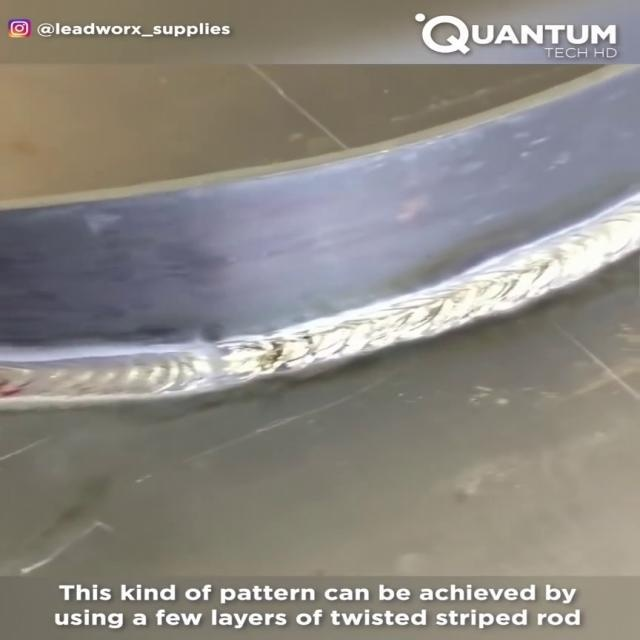


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/good_weld_vid634_jpeg_jpg.rf.9b7bc6b6e69b54eb707c9bab8857b7a1.jpg: 640x640 1 Good Weld, 10.5ms
Speed: 3.0ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


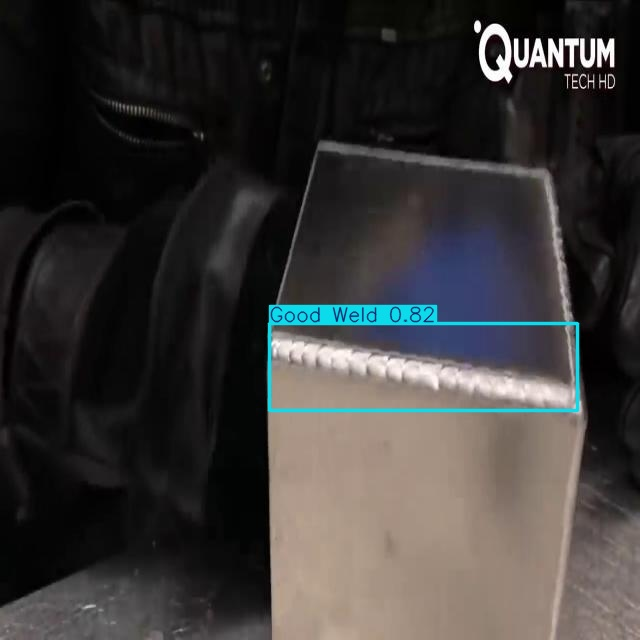


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/poor-Welding-Images_8_jpeg_jpg.rf.b9316d294ddc2466e9565069260103d0.jpg: 640x640 1 Bad Weld, 1 Good Weld, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


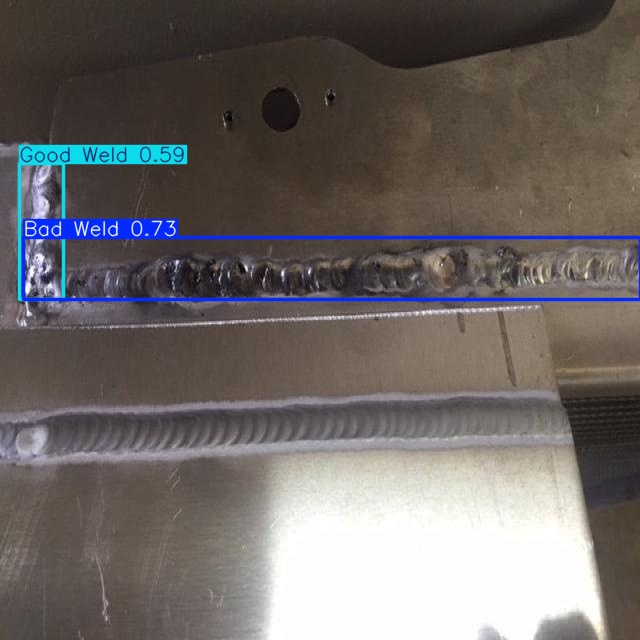


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/SampleV2_1_mp4-0_jpg.rf.32dc225d9b5d11d01260f75c918a9961.jpg: 640x640 3 Bad Welds, 11 Good Welds, 2 Defects, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


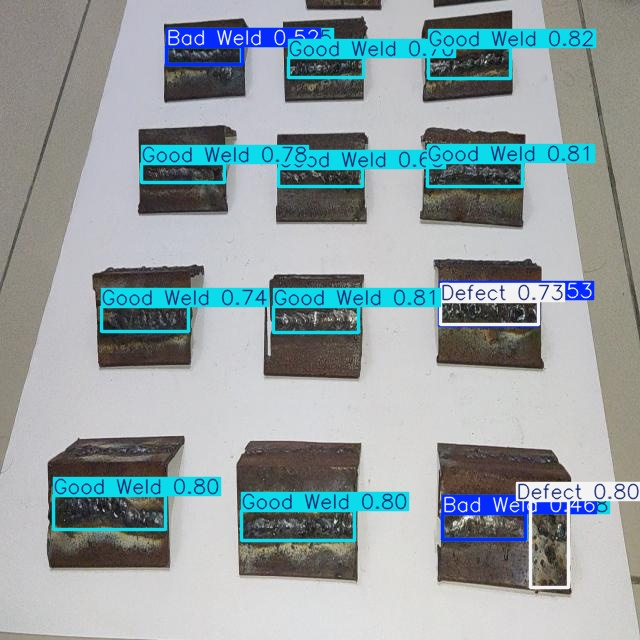


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/SampleV2_2_mp4-71_jpg.rf.de0eaa495c44a7817fab26c6c6277796.jpg: 640x640 1 Bad Weld, 3 Good Welds, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


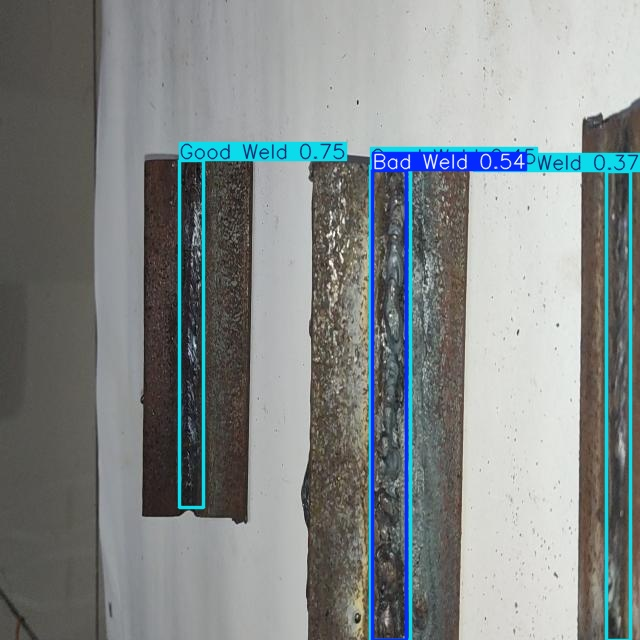

Displaying results from model trained on version 2 with augmentation:

image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/SampleV3_1_mp4-8_jpg.rf.15adb36ac87bf5e5533ced60df5f5635.jpg: 640x640 2 Good Welds, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


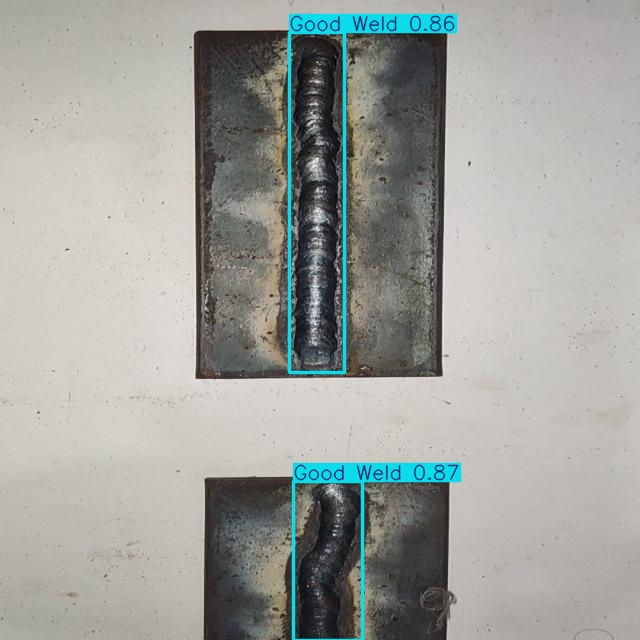


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/SampleV2_2_mp4-24_jpg.rf.0909700c29763d6bbe0f3e7df949475b.jpg: 640x640 2 Bad Welds, 3 Good Welds, 3 Defects, 12.6ms
Speed: 3.8ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


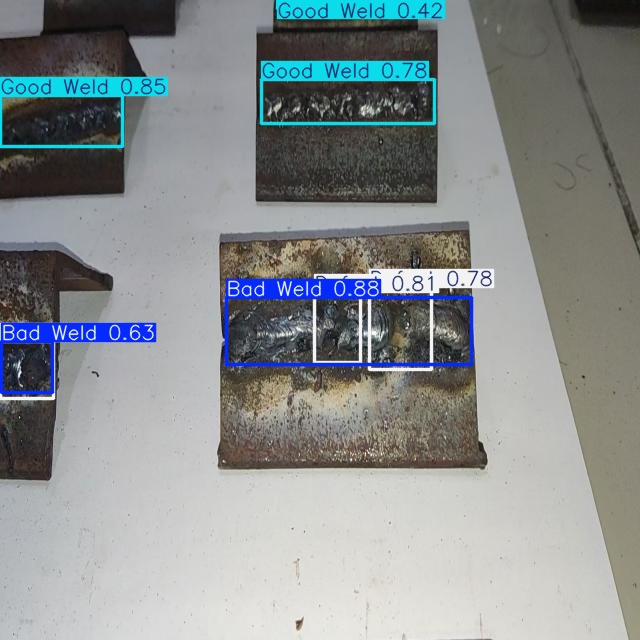


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/Slag-inclusion-welding-images_11_jpeg.rf.06f53c90b96f942c575dad2d8ba10992.jpg: 640x640 1 Good Weld, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


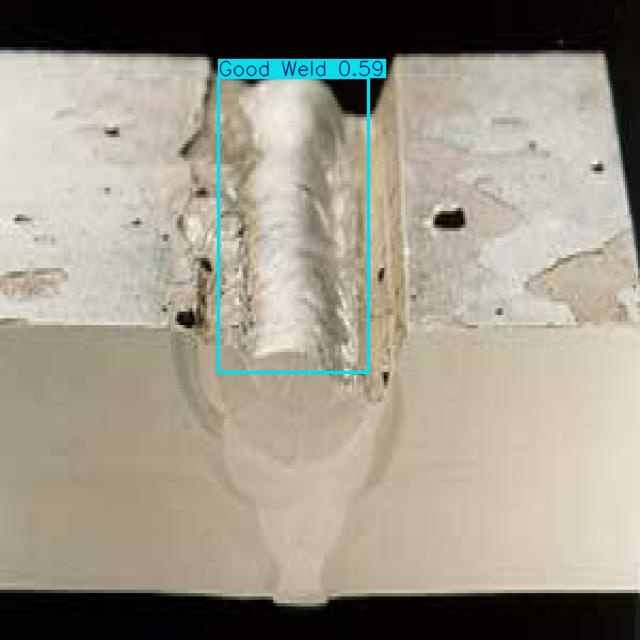


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/bad_weld_vid199_jpeg.rf.2b6c1dc8c0858d47d0cf1eaf41d55663.jpg: 640x640 1 Bad Weld, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


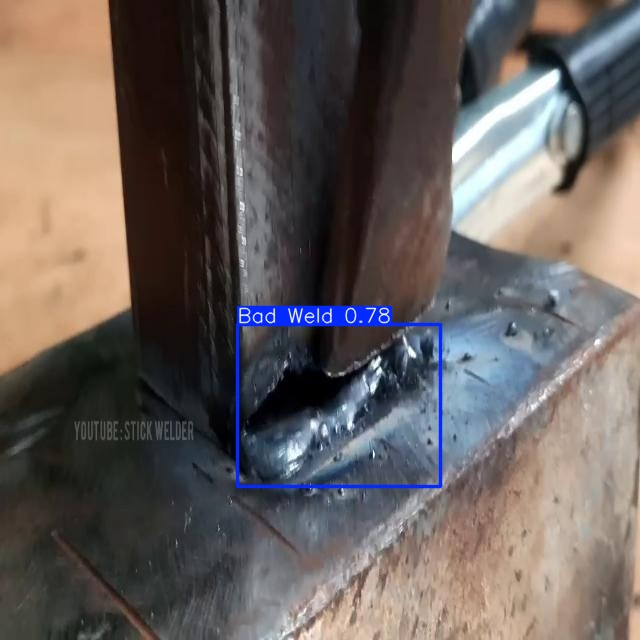


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/good_weld_vid469_jpeg.rf.bb8d4104e49f8bd79aef34b7ed48b49f.jpg: 640x640 1 Good Weld, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


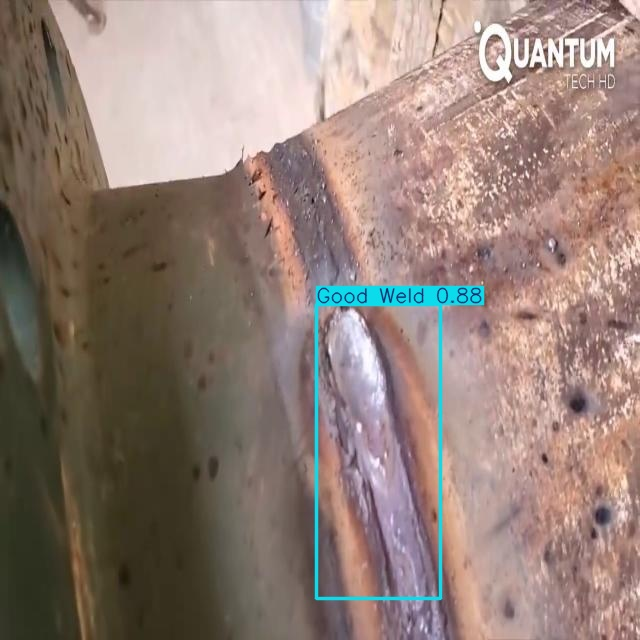

In [ ]:
# Evaluate the model and display results
def display_results(model, img_dir, num_images=5):
    images = os.listdir(img_dir)
    sample_images = random.sample(images, num_images)
    save_dir = 'runs/detect/exp'
    os.makedirs(save_dir, exist_ok=True)

    for image_name in sample_images:
        image_path = os.path.join(img_dir, image_name)
        results = model(image_path)
        for result in results:
            result.plot(save=True, filename=os.path.join(save_dir, os.path.basename(result.path)))
            result_image_path = os.path.join(save_dir, os.path.basename(result.path))
            display(Image(filename=result_image_path))

print("Displaying results from model trained on version 1 with augmentation:")
display_results(model_v1, os.path.join(v1_dir, 'test/images'))

print("Displaying results from model trained on version 2 with augmentation:")
display_results(model_v2, os.path.join(v2_dir, 'test/images'))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Define the folder in your Colab environment
source_folder = '/content/runs'

# Define the destination folder on your Google Drive
destination_folder = '/content/drive/My Drive/WeldingModelRun04072025'

# Copy the folder
shutil.copytree(source_folder, destination_folder)

'/content/drive/My Drive/WeldingModelRun04072025'

In [ ]:
model_path = '/content/best.pt'  # Update with your correct model path

# Load the YOLOv8 model
model = YOLO(model_path)

In [ ]:
model_v1 = YOLO('/content/best.pt')
model_v2 = YOLO('/content/best_2.pt')

Displaying results from model trained on version 1 with augmentation:

image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/bad_weld_vid233_jpeg_jpg.rf.17d61563d86c4d1fc157c29f5a109d98.jpg: 640x640 1 Good Weld, 37.0ms
Speed: 2.5ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


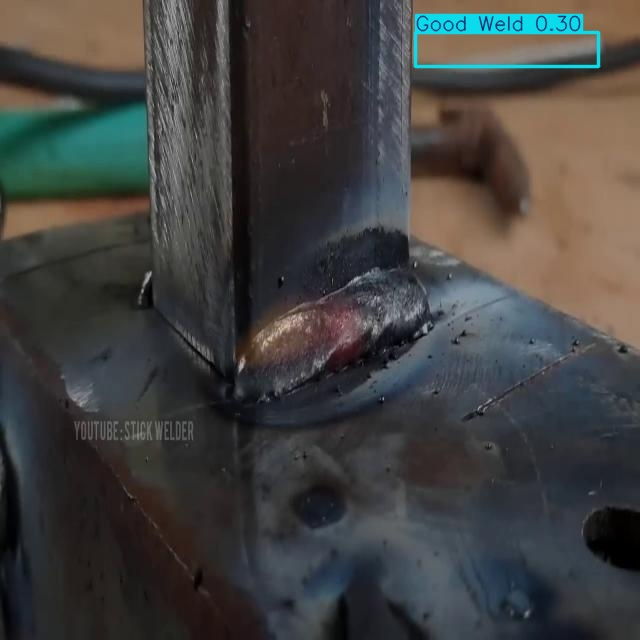


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/poor-Welding-Images_22_jpeg_jpg.rf.3706f7e9a367ae053abfee4902a78288.jpg: 640x640 2 Bad Welds, 1 Good Weld, 36.3ms
Speed: 2.4ms preprocess, 36.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


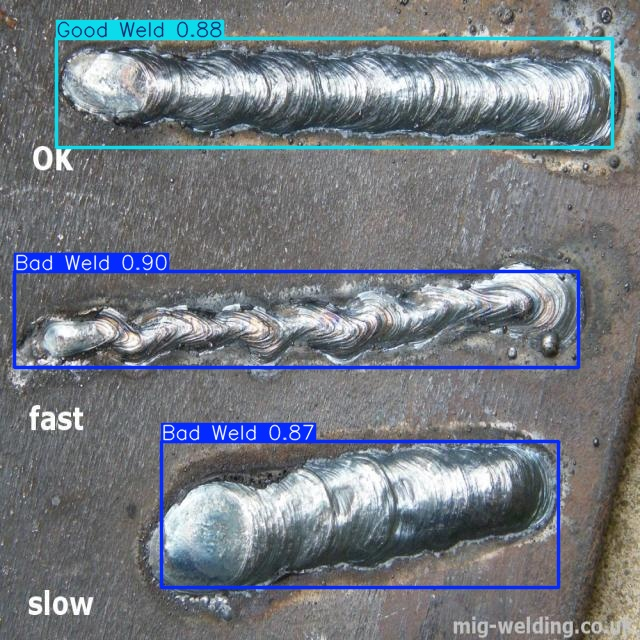


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/bad_weld_vid277_jpeg_jpg.rf.0e6aafa2605c842edfaedaba06ded02c.jpg: 640x640 1 Bad Weld, 1 Good Weld, 36.2ms
Speed: 2.3ms preprocess, 36.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


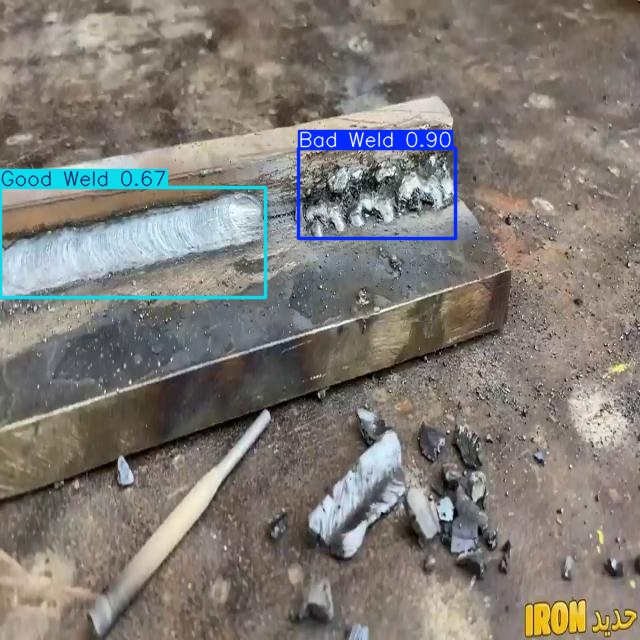


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/bad_weld_vid166_jpeg_jpg.rf.525052424b574a43de777660f6cb2d10.jpg: 640x640 1 Bad Weld, 36.2ms
Speed: 2.3ms preprocess, 36.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


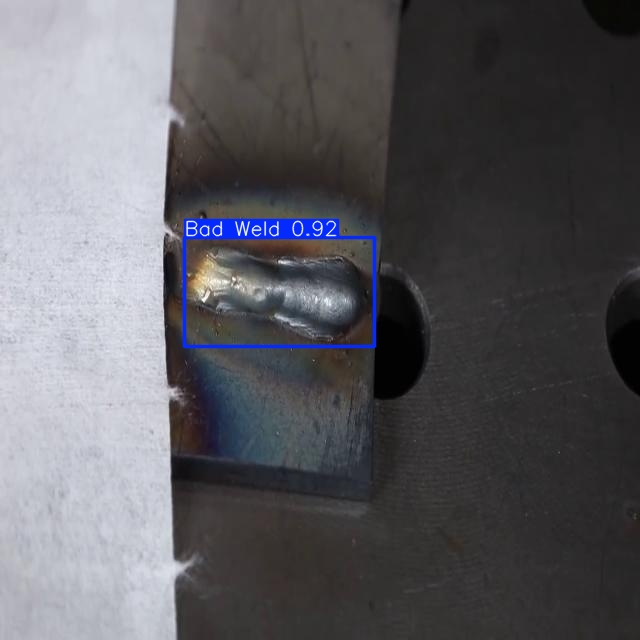


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/Good-Welding-images_23_jpeg_jpg.rf.fdf50352e3c124ff6edab3e96257a040.jpg: 640x640 1 Good Weld, 1 Defect, 29.2ms
Speed: 2.5ms preprocess, 29.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


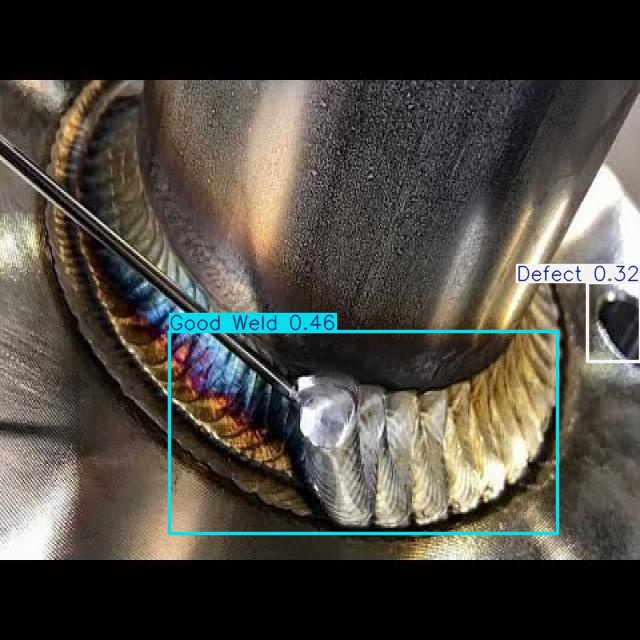

Displaying results from model trained on version 2 with augmentation:

image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/Good-Welding-images_33_jpeg_jpg.rf.782ccc0dfca926b946a6b664dd4cacd1.jpg: 640x640 1 Good Weld, 26.9ms
Speed: 2.5ms preprocess, 26.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


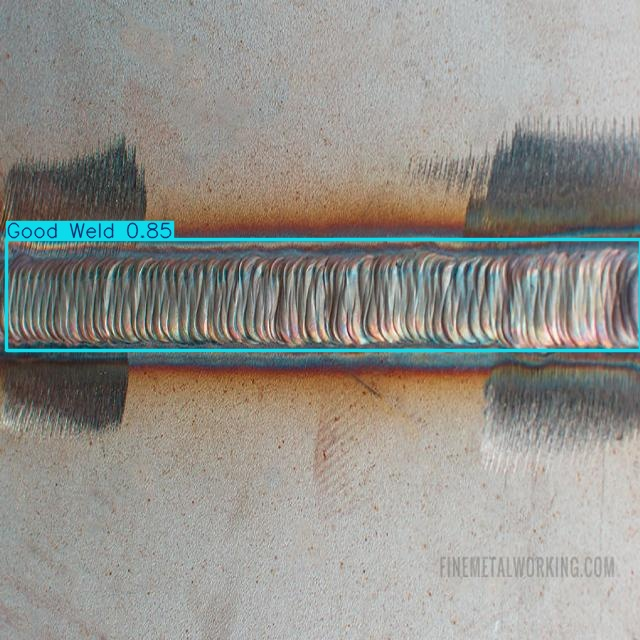


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/bad_weld_vid277_jpeg_jpg.rf.0e6aafa2605c842edfaedaba06ded02c.jpg: 640x640 1 Bad Weld, 1 Good Weld, 50.1ms
Speed: 9.9ms preprocess, 50.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


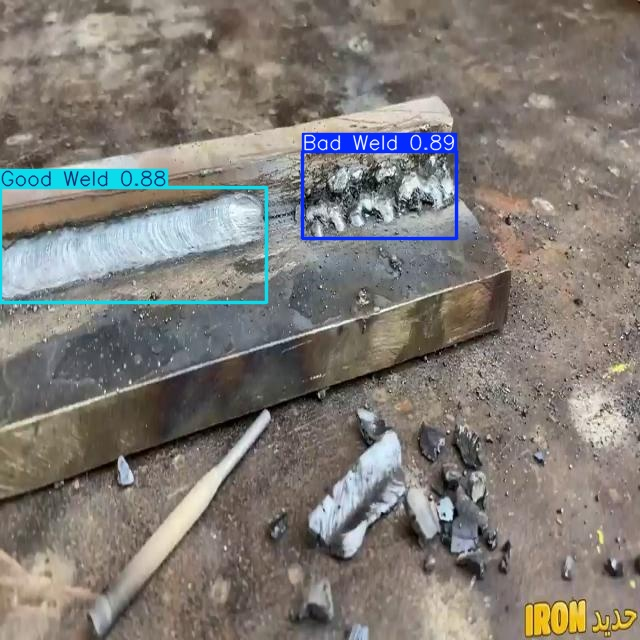


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/good_weld_vid274_jpeg.rf.b6f11d0f012275ef3823e747c05bb460.jpg: 640x640 1 Good Weld, 32.5ms
Speed: 2.5ms preprocess, 32.5ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


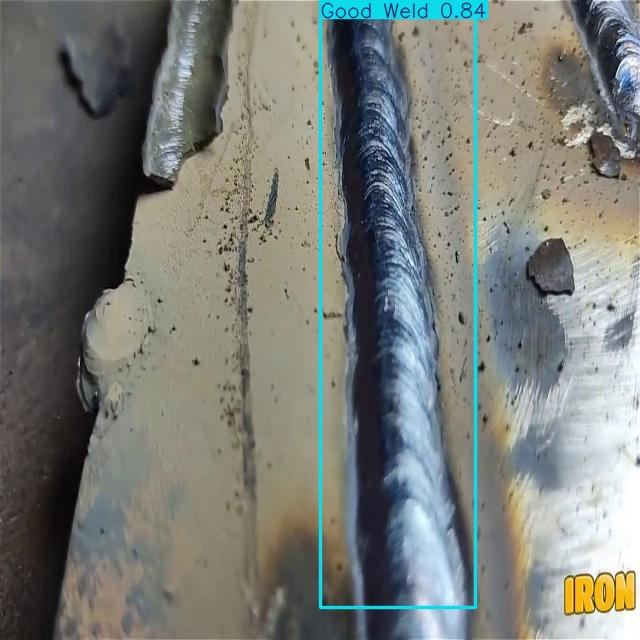


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/bad_weld_vid278_jpeg_jpg.rf.d7b37caf0f75a2942cae27dedf5c4c64.jpg: 640x640 1 Bad Weld, 1 Good Weld, 43.0ms
Speed: 16.2ms preprocess, 43.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


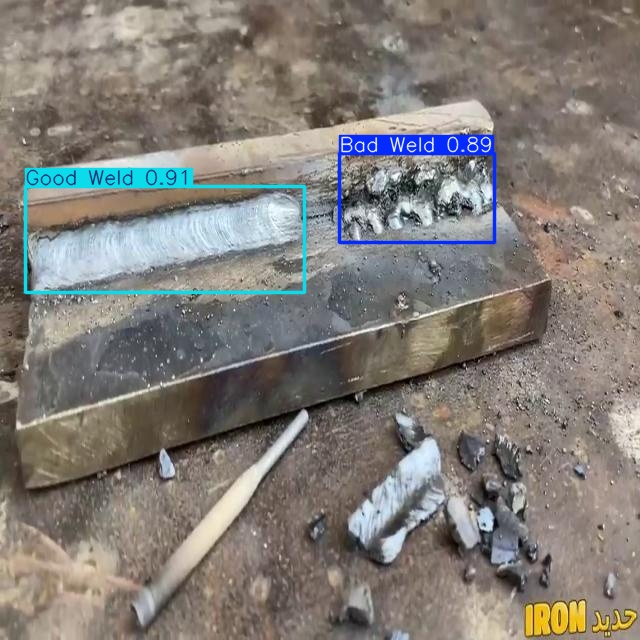


image 1/1 /content/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/SampleV2_1_mp4-59_jpg.rf.b500f4a89177615c16be765f9f15b910.jpg: 640x640 1 Bad Weld, 2 Good Welds, 1 Defect, 38.7ms
Speed: 6.7ms preprocess, 38.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


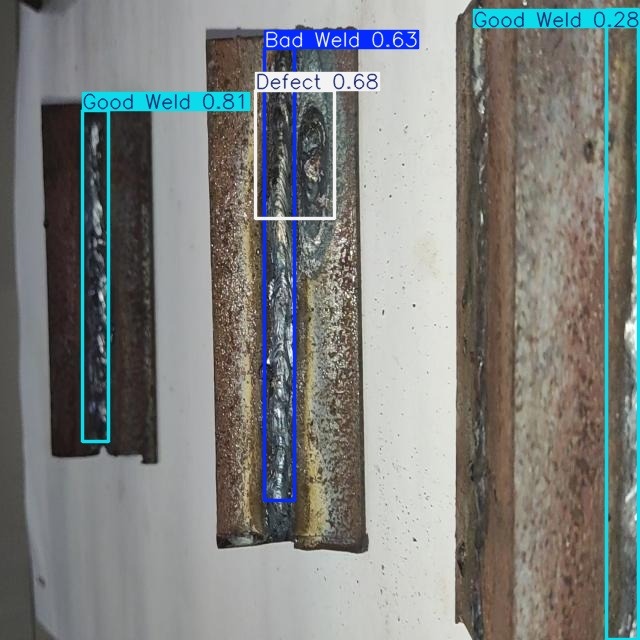

In [ ]:
model_path = '/content/best.pt'  # Update with your correct model path
# Define paths
root_dir = '/content/welding-defect-object-detection/'
v1_dir = os.path.join(root_dir, 'The Welding Defect Dataset/The Welding Defect Dataset')
v2_dir = os.path.join(root_dir, 'The Welding Defect Dataset - v2/The Welding Defect Dataset - v2')
# Load the YOLOv8 model
model = YOLO(model_path)

model_v1 = YOLO('/content/best.pt')
model_v2 = YOLO('/content/best_2.pt')

def display_results(model, img_dir, num_images=5):
    images = os.listdir(img_dir)
    sample_images = random.sample(images, num_images)
    save_dir = 'runs/detect/exp'
    os.makedirs(save_dir, exist_ok=True)

    for image_name in sample_images:
        image_path = os.path.join(img_dir, image_name)
        results = model(image_path)
        for result in results:
            result.plot(save=True, filename=os.path.join(save_dir, os.path.basename(result.path)))
            result_image_path = os.path.join(save_dir, os.path.basename(result.path))
            display(Image(filename=result_image_path))

print("Displaying results from model trained on version 1 with augmentation:")
display_results(model_v1, os.path.join(v1_dir, 'test/images'))

print("Displaying results from model trained on version 2 with augmentation:")
display_results(model_v2, os.path.join(v2_dir, 'test/images'))